In [621]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm=MinMaxScaler()
st=StandardScaler()


from matplotlib import font_manager
f_path = '/Library/Fonts/NanumGothic.ttf'
font_manager.FontProperties(fname=f_path).get_name()

import plotly.express as px

from matplotlib import rc
rc('font', family = 'NanumGothic')

import warnings
warnings.filterwarnings(action='ignore')

socar_all = pd.read_csv('./insurance_fraud_detect_data.csv')
# pd.set_option('display.float_format', None)

pd.options.display.float_format = '{:.6f}'.format


In [622]:
socar_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               16000 non-null  int64  
 1   car_model              16000 non-null  int64  
 2   sharing_type           16000 non-null  int64  
 3   age_group              16000 non-null  int64  
 4   has_previous_accident  16000 non-null  int64  
 5   cumulative_use_count   16000 non-null  int64  
 6   b2b                    16000 non-null  int64  
 7   accident_ratio         16000 non-null  int64  
 8   pf_type                16000 non-null  int64  
 9   socarpass              16000 non-null  int64  
 10  socarsave              16000 non-null  int64  
 11  start_hour             16000 non-null  int64  
 12  duration               16000 non-null  int64  
 13  accident_hour          16000 non-null  int64  
 14  repair_cost            16000 non-null  float64
 15  in

In [623]:
pd.options.display.max_columns = len(socar_all.columns)
socar_all.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,0,4,2,4,130254.678000,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,0,1,4,4,0.000000,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,0,1,4,6,258130.579800,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,0,3,3,5,1341009.163000,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,0,1,1,1,524030.569600,1209410,1,0,0,2,0,0,0,-1,0


In [624]:
socar_all['label'].value_counts()

0    15959
1       41
Name: fraud_YN, dtype: int64

In [625]:
# frauad_all 데이터 전체 바라보기
fraud_all = socar_all[socar_all['label']==1]
pd.options.display.max_columns = len(fraud_all.columns)
pd.options.display.float_format = '{:.5f}'.format
fraud_all.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
6,1,1,1,3,0,4,0,100,3,0,0,6,3,1,0.00000,1217280,0,0,0,1,1,2,1,2,0
18,1,1,0,1,0,4,0,100,1,0,0,1,2,1,3007611.44900,0,1,0,0,2,0,0,0,-1,0
45,1,2,0,1,0,2,0,100,1,1,1,5,4,6,0.00000,0,0,1,0,1,0,0,0,-1,0
60,1,1,0,3,0,3,0,100,3,0,0,2,4,1,0.00000,0,0,1,0,1,0,0,0,-1,0
83,1,2,0,2,0,1,0,100,1,0,0,6,2,2,875554.03520,0,1,0,0,1,0,0,0,-1,0


In [626]:
# non frauad_all 데이터 전체 바라보기
non_fraud_all = socar_all[socar_all['label']!=1]
pd.options.display.max_columns = len(non_fraud_all.columns)
non_fraud_all.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,0,4,2,4,130254.67800,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,0,1,4,4,0.00000,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,0,1,4,6,258130.57980,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,0,3,3,5,1341009.16300,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,0,1,1,1,524030.56960,1209410,1,0,0,2,0,0,0,-1,0


In [627]:
# 보험 현장 출동 유무 알수없음과 보험사 현장출동x 합치기
socar_all.loc[socar_all['s21']==2, 's21'] = 0

In [628]:
# 경찰 현장 출동 유무 알수없음과 미신고 합치기
socar_all.loc[socar_all['s22']==2, 's22'] = 0

In [629]:
# 법인 고객 유무를 0,1 로 나눠줌
socar_all.loc[socar_all['s6']==2, 's6'] = 1

In [630]:
# 수리부위 아웃라이어 제거(fraud 데이터에 해당하지 않음)
socar_all = socar_all[socar_all['s19']<4]

# accident hour -1은 제거(fraud 데이터에 해당하지 않음)
socar_all = socar_all[socar_all['s13'] > 0]

# car model 4, 5 제거(fraud 데이터에 해당하지 않음)
socar_all = socar_all[socar_all['s1']<4]

In [631]:
# fraud data에 있는 nan 값을 제거 (대여기간 5제거, 사고장소 3,5 제거, 탑승인원 4이상 제거)
socar_all= socar_all[socar_all['s12']<5]
socar_all = socar_all[(socar_all['s16'] != 5) & (socar_all['s16'] != 3)]
socar_all = socar_all[socar_all['s23']<4]

In [632]:
np.mean(socar_all.loc[socar_all['s14'] !=0, 's14'])

406236.1285350535

In [633]:
np.mean(socar_all.loc[socar_all['s15'] !=0, 's15'])

2153960.1165501163

In [634]:
np.median(socar_all.loc[socar_all['s15'] !=0, 's15'])

975630.0

In [635]:
# 자동차 수리비용이 0인 것은 평균값을 넣어줌
socar_all.loc[socar_all['s14'] == 0, 's14'] = np.mean(socar_all.loc[socar_all['s14'] !=0, 's14'])

# 보험 비용은 중간값을 넣어줌
socar_all.loc[socar_all['s15'] == 0, 's15'] = np.median(socar_all.loc[socar_all['s15'] !=0, 's15'])

Text(0.5, 1.0, 'insure_cost')

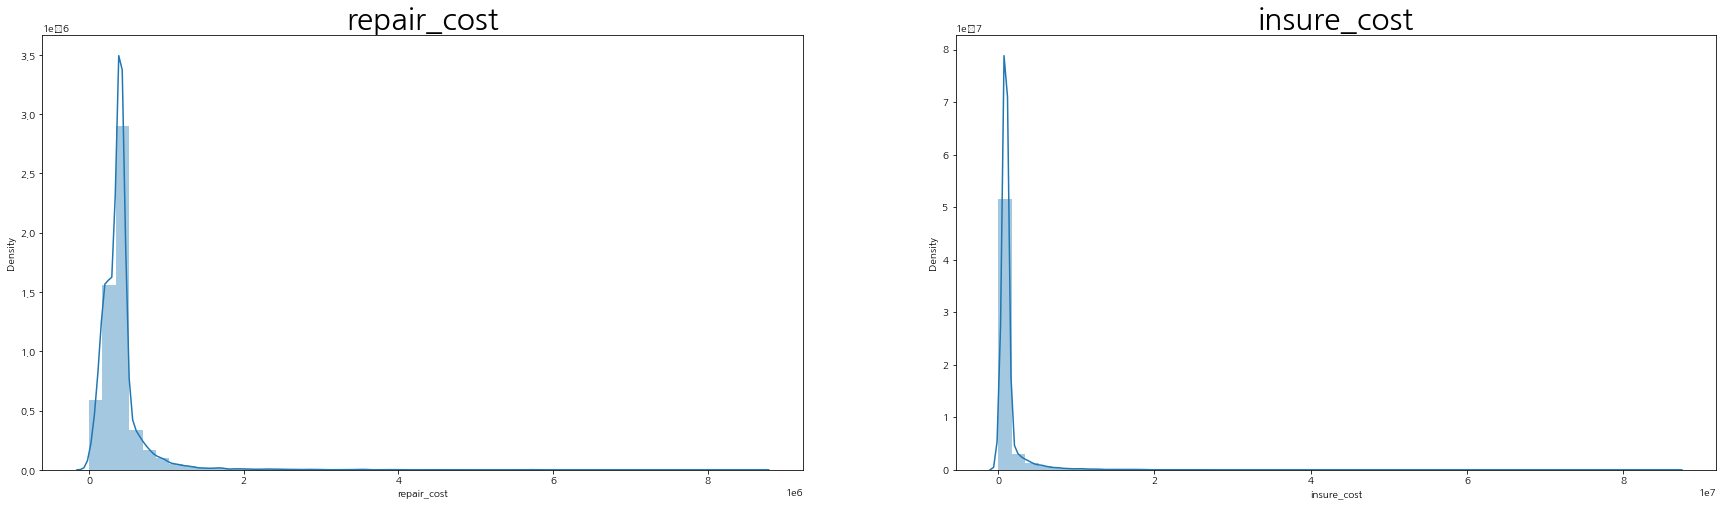

In [636]:
figure, ((ax1,ax2)) = plt.subplots(ncols=2)
figure.set_size_inches(30,8)

sns.distplot(socar_all['s14'], ax=ax1)
ax1.set_title('s14', fontsize = 30)
sns.distplot(socar_all['s15'], ax=ax2)
ax2.set_title('s15', fontsize = 30)

In [637]:
# 전체데이터의 컬럼별 숫자를 확인합니다.

for i in ['s1','s2','age_group','s4','s5','s6','s7'\
          ,'s8','s9','s10','s11','s12','s13','s14','s15',\
          's16','s17','s18','s19','s20'\
          ,'s21','s22','s23']:  
    
    print(i)
    print(socar_all[i].value_counts())
    print('------------------')

car_model
2    7360
1    5854
3     459
Name: car_model, dtype: int64
------------------
sharing_type
0    11729
1     1944
Name: sharing_type, dtype: int64
------------------
age_group
2    4932
1    2975
3    2880
4    2050
5     836
Name: age_group, dtype: int64
------------------
has_previous_accident
0    12515
1     1158
Name: has_previous_accident, dtype: int64
------------------
cumulative_use_count
2    4199
4    4192
1    3295
3    1987
Name: cumulative_use_count, dtype: int64
------------------
b2b
0    13580
1       93
Name: b2b, dtype: int64
------------------
accident_ratio
100    11856
0       1119
90       119
80       114
30        93
70        79
20        79
50        49
10        49
60        47
40        47
85        10
75         5
25         3
65         2
15         1
55         1
Name: accident_ratio, dtype: int64
------------------
pf_type
1    6106
2    5030
3    2537
Name: pf_type, dtype: int64
------------------
socarpass
0    11483
1     2190
Name: socarpa

In [638]:
fraud_all[(fraud_all['s7'] == 100) & (fraud_all['s15'] ==0)]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
18,1,1,0,1,0,4,0,100,1,0,0,1,2,1,3007611.44900,0,1,0,0,2,0,0,0,-1,0
45,1,2,0,1,0,2,0,100,1,1,1,5,4,6,0.00000,0,0,1,0,1,0,0,0,-1,0
60,1,1,0,3,0,3,0,100,3,0,0,2,4,1,0.00000,0,0,1,0,1,0,0,0,-1,0
83,1,2,0,2,0,1,0,100,1,0,0,6,2,2,875554.03520,0,1,0,0,1,0,0,0,-1,0
100,1,2,0,2,0,1,0,100,1,0,1,4,2,4,0.00000,0,2,0,1,1,0,0,0,-1,1
182,1,2,0,3,1,4,0,100,1,0,0,5,3,1,0.00000,0,0,0,0,1,0,0,0,-1,1
230,1,2,0,3,0,4,0,100,2,0,0,4,1,4,0.00000,0,0,1,0,1,0,0,0,-1,0
301,1,1,0,4,0,1,0,100,3,0,1,1,4,3,0.00000,0,2,0,0,1,0,0,0,-1,0
364,1,2,0,3,1,4,0,100,1,0,0,4,1,5,323583.55550,0,1,0,0,2,0,0,0,-1,0
401,1,1,0,4,0,1,0,100,1,0,0,5,3,5,0.00000,0,4,0,0,1,0,0,0,-1,1


In [639]:
non_fraud_all[(non_fraud_all['s7'] == 100) & (non_fraud_all['s15'] !=0) & (non_fraud_all['s14'] ==0)]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
5,0,2,1,3,0,1,0,100,1,0,1,6,2,6,0.00000,4777030,1,1,0,1,1,1,1,0,1
21,0,2,0,3,0,4,0,100,2,0,0,4,3,4,0.00000,355200,1,0,0,2,0,0,0,-1,0
54,0,1,0,3,0,1,0,100,3,0,0,2,1,1,0.00000,1950000,1,0,0,1,1,1,1,1,1
58,0,1,0,4,0,3,0,100,1,0,0,1,1,1,0.00000,3266020,1,1,0,1,1,1,1,1,0
62,0,1,0,2,0,2,0,100,2,0,0,2,1,2,0.00000,1149500,1,0,0,1,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15945,0,1,0,2,0,3,0,100,3,0,0,5,1,6,0.00000,4043400,3,1,0,1,0,0,0,-1,0
15947,0,1,0,5,0,4,0,100,2,0,0,4,1,4,0.00000,593070,0,0,1,2,1,1,1,0,0
15957,0,2,0,2,0,4,0,100,1,0,0,6,5,2,0.00000,345390,1,1,0,2,0,0,0,-1,0
15978,0,1,0,2,0,4,0,100,3,0,0,5,1,6,0.00000,1708720,0,0,0,1,1,1,1,1,1


In [677]:
# fraud data만을 숫자로 바라보기
for i in ['s1','s2','age_group','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23']:  
    
    print(i)
    print(fraud_all[i].value_counts())
    print('------------------')

car_model
2    23
1    16
3     2
Name: car_model, dtype: int64
------------------
sharing_type
0    35
1     6
Name: sharing_type, dtype: int64
------------------
age_group
1    13
3    11
2    10
4     6
5     1
Name: age_group, dtype: int64
------------------
has_previous_accident
0    37
1     4
Name: has_previous_accident, dtype: int64
------------------
cumulative_use_count
4    14
1    14
2     7
3     6
Name: cumulative_use_count, dtype: int64
------------------
b2b
0    41
Name: b2b, dtype: int64
------------------
accident_ratio
100    39
40      1
0       1
Name: accident_ratio, dtype: int64
------------------
pf_type
1    25
3     9
2     7
Name: pf_type, dtype: int64
------------------
socarpass
0    35
1     6
Name: socarpass, dtype: int64
------------------
socarsave
0    35
1     6
Name: socarsave, dtype: int64
------------------
start_hour
5    10
4    10
1     8
6     6
2     5
3     2
Name: start_hour, dtype: int64
------------------
duration
3    17
1     9
2     8


In [641]:
# 프로드데이터 컬럼명 수와 / 전체 컬럼명 수를 나눔

for i in ['s1','s2','age_group','s4','s5','s6','s7'\
          ,'s8','s9','s10','s11','s12','s13','s14','s15',\
          's16','s17','s18','s19','s20','s21',\
            's22','s23']:  
    
    print(i)
    print(fraud_all[i].value_counts() / socar_all[i].value_counts())
    print('------------------')
   

car_model
2   0.00313
1   0.00273
3   0.00436
Name: car_model, dtype: float64
------------------
sharing_type
0   0.00298
1   0.00309
Name: sharing_type, dtype: float64
------------------
age_group
1   0.00437
2   0.00203
3   0.00382
4   0.00293
5   0.00120
Name: age_group, dtype: float64
------------------
has_previous_accident
0   0.00296
1   0.00345
Name: has_previous_accident, dtype: float64
------------------
cumulative_use_count
1   0.00425
2   0.00167
3   0.00302
4   0.00334
Name: cumulative_use_count, dtype: float64
------------------
b2b
0   0.00302
1       nan
Name: b2b, dtype: float64
------------------
accident_ratio
0     0.00089
10        nan
15        nan
20        nan
25        nan
30        nan
40    0.02128
50        nan
55        nan
60        nan
65        nan
70        nan
75        nan
80        nan
85        nan
90        nan
100   0.00329
Name: accident_ratio, dtype: float64
------------------
pf_type
1   0.00409
2   0.00139
3   0.00355
Name: pf_type, dtype: flo

In [642]:
# 준중형차가 사고가 많이 일어남 / 준중형 사고 많이남    / 대형,승합에서 가장 높고(근데 fraud 데이터는 2개), 준중형이 다음으로 높음
# 부름이 대다수를 차지함 / 부름이 대다수 / fraud의 비율은 비슷함
# 23-27세 사이가 가장 많이 사고를 냄 / 21~23이 가장 많음, 27세 이상  / 21~23세 비율이 가장 높고, 27~31 다음으로 높음
# 처음사고를 일으킨 사람들이 더 많음 / 처음 사고인 사람들이 많음 / 처음 사고인 사람이 fraud일 확률이 높음
# 10회 이상 빌린 사람들이 사고를 더 많이 냄 / 10회이상 많이 빌린사람이 많고 다음이 처음빌려서 사고냄 / 1회 빌린 사람이 fraud일 확률이 가장 높음, 그 다음이 10회 이상
# 법인고객은 적음 / 법인고객중 없음
# 사고과실은 86%가 100% / 100 % 과실이 대다수
# 보험은 pf3이 가장 많음 / pf3이 가장 많음 / pf3이 fraud일 확률이 높다
# s9, s10 이용은 적음 / 35:6 / s10를 한 사람이 fraud일 확률이 높다(2배)
# 빌린시간 : 11시~13시에 빌려서 사고가 남, 08~10시에 그 다음, 17시~20시 / 11시~13시 사고 남, 08~10시  / 21~04 가 frauad일 확률이 높고, 08~10시가 다음, 17시~10시가 가장 낮음
# 대여기간 : 2~5시간, 10~36시간, 6~9시간 / 10~36시간이 많음, 2~5시간 빌려서 사고냄  / 37시간 이상이 높다, 10~36시간이 다음
# 사고시간 : 17~20, 21~04, 14~16 / 21~04, 14~16 / 05-07시 가 가장 높다, 08~10시가 다음
# 사고위치 : 일반도로, 주차장 / 주차장, 일반도로  / 이면도로에서 fraud일 확률이 가장 높다, 그 다음은 주차장
# 전면손상 없는게 대부분 / 없는게 더 많지만 비율이 비슷함 / 전면손상이 있으면 fraud일 확률이 더 높다
# 후면손상 없는게 대부분 /     / 후면 손상이 없으면 fraud일 확률이 높다 / 수리 부위 개수가 1이면 fraud일 확률이 높다
# 사고유형 : 기타가 가장 많음 / 기타가 많다
# 보험사출동 : 알수없음이 대부분 / 보험사가 현장 출동을 했을 경우 fraud일 확률이 더 높다
# 경찰 출동 : 알수없음이 대부분 / 경찰이 출동할 경우 fraud 데이터일 확률이 높다
# 동승자 : 미확인이 대부분


* #### 준중형의 차를 빌린 21-23세 사이의 법인에. 속하지 않은 사람이 처음으로 pf3 보험을 택해서 s10차량을 빌려서 100% 사고를 21-04사이에 36시간 이상을 몰다가 이면도로에서 전면손상 사고를 냈는데 수리부위가 1개이고 보험사와 경찰이 출동했으면 그분은 나쁜 사람일수도.. 

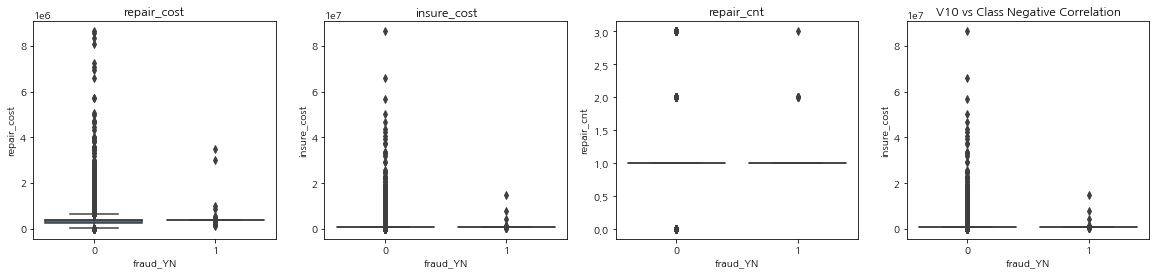

In [643]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="label", y="s14", data=socar_all,  ax=axes[0])
axes[0].set_title('s14')

sns.boxplot(x="label", y="s15", data=socar_all, ax=axes[1])
axes[1].set_title('s15')


sns.boxplot(x="label", y="s19", data=socar_all, ax=axes[2])
axes[2].set_title('s19')


sns.boxplot(x="label", y="s15", data=socar_all, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [644]:
# non_fraud 와 fraud_all 차수리비용과 보험비용의 아웃라이어
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=non_fraud_all['s14'], name="s14"))
fig.add_trace(go.Box(y=non_fraud_all['s15'], name="s15"))
fig.add_trace(go.Box(y=fraud_all['s14'], name="fraud_s14"))
fig.add_trace(go.Box(y=fraud_all['s15'], name="fraud_s15"))

fig.show()

In [645]:
non_fraud_all['s14'].max(), fraud_all['s14'].max()

(9713773.544, 3507659.1580000003)

In [646]:
non_fraud_all['s15'].max(), fraud_all['s15'].max()

(94714350, 14865500)

In [647]:
# fraud data에 없는 차 수리비용과 보험료를 제거 해줌으로써 언더샘플링을 시도함

# fraud 데이터에는 없는 보험비용은 삭제
socar_all = socar_all[socar_all['s15'] < 15000000]

# fraud 데이터에는 없는 수리비용은 삭제
socar_all = socar_all[socar_all['s14'] < 3600000]

In [648]:
# fraud_all 포함되지 않은 아웃라이어 제거 차수리비용과 보험비용의 아웃라이어
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=socar_all['s14'], name="s14"))
fig.add_trace(go.Box(y=socar_all['s15'], name="s15"))


fig.show()

In [649]:
# 로그스케일하기 (분포가 넓으므로 로그스케일 해주기)

socar_all['scaled_s14'] = np.log1p(socar_all['s14'])
socar_all['scaled_s15'] = np.log1p(socar_all['s15'])

Text(0.5, 1.0, 'scaled_insure_cost')

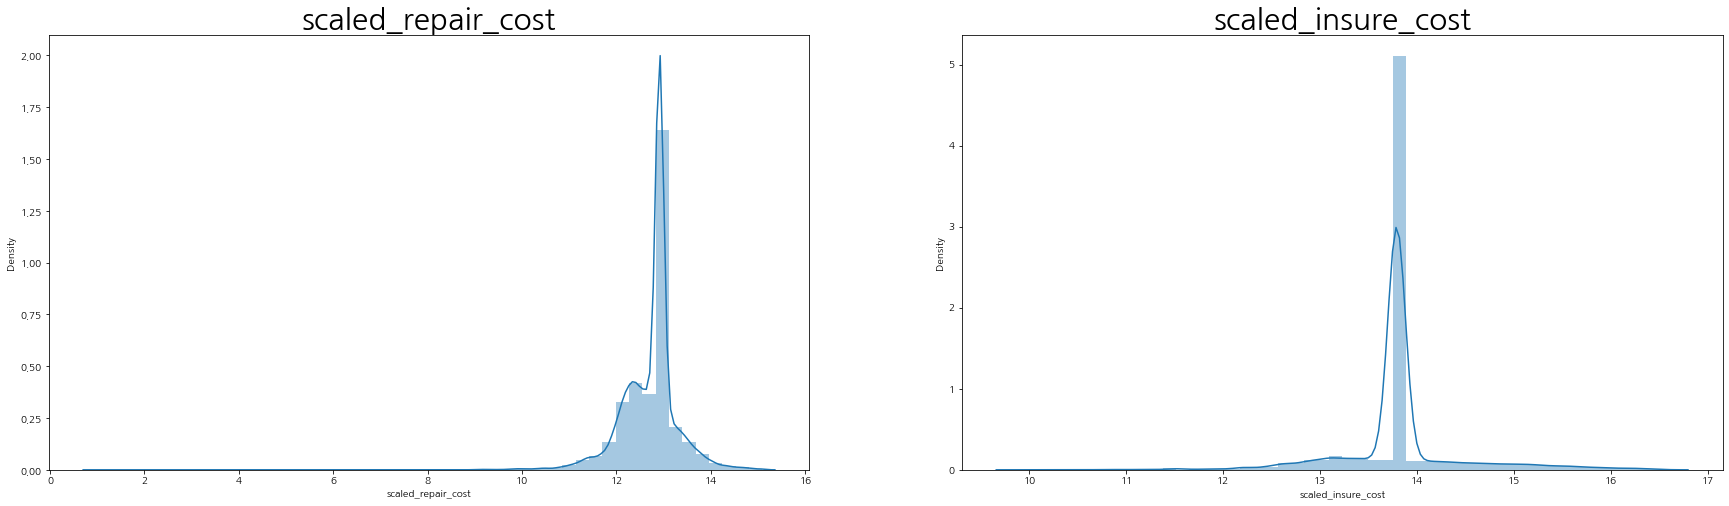

In [650]:
figure, ((ax1,ax2)) = plt.subplots(ncols=2)
figure.set_size_inches(30,8)

sns.distplot(socar_all['scaled_s14'], ax=ax1)
ax1.set_title('scaled_s14', fontsize = 30)
sns.distplot(socar_all['scaled_s15'], ax=ax2)
ax2.set_title('scaled_s15', fontsize = 30)

In [651]:
socar_all.loc[(socar_all['s1']== 1) | (socar_all['s1']== 2) , 's1'] = 0
socar_all.loc[socar_all['s1']== 3 , 's1'] = 1

socar_all['s1'].value_counts()

0    13139
1      455
Name: car_model, dtype: int64

In [652]:
socar_all.loc[(socar_all['age_group']== 1) | (socar_all['age_group']== 2)| (socar_all['age_group']== 3)  , 'age_group'] = 0
socar_all.loc[(socar_all['age_group']== 4) | (socar_all['age_group']== 5) , 'age_group'] = 1

socar_all['age_group'].value_counts()

0    10730
1     2864
Name: age_group, dtype: int64

In [653]:
socar_all.loc[(socar_all['s5']== 1) | (socar_all['s5']== 4)  , 's5'] = 0
socar_all.loc[(socar_all['s5']== 2) | (socar_all['s5']== 3) , 's5'] = 1

socar_all['s5'].value_counts()

0    7435
1    6159
Name: cumulative_use_count, dtype: int64

In [654]:
socar_all.loc[socar_all['s7']!= 100 , 's7'] = 1
socar_all.loc[(socar_all['s7']== 100) , 's7'] = 0


socar_all['s7'].value_counts()

0    11790
1     1804
Name: accident_ratio, dtype: int64

In [655]:
socar_all.loc[(socar_all['s8']== 1) | (socar_all['s8']== 3) , 's8'] = 0
socar_all.loc[socar_all['s8']== 2 , 's8'] = 1

socar_all['s8'].value_counts()

0    8590
1    5004
Name: pf_type, dtype: int64

In [656]:
socar_all.loc[(socar_all['s11']== 1) | (socar_all['s11']== 4)| (socar_all['s11']== 5) | (socar_all['s11']== 6)  , 's11'] = 0
socar_all.loc[(socar_all['s11']== 2) | (socar_all['s11']== 3) , 's11'] = 1

socar_all['s11'].value_counts()

0    10244
1     3350
Name: start_hour, dtype: int64

In [657]:
socar_all.loc[(socar_all['s12']== 1) | (socar_all['s12']== 2)| (socar_all['s12']== 3)  , 's12'] = 0
socar_all.loc[(socar_all['s12']== 4),  's12'] = 1

socar_all['s12'].value_counts()

0    12257
1     1337
Name: duration, dtype: int64

In [658]:
socar_all.loc[(socar_all['s13']== 1) | (socar_all['s13']== 4)| (socar_all['s13']== 5) | (socar_all['s13']== 6)  , 's13'] = 0
socar_all.loc[(socar_all['s13']== 2) | (socar_all['s13']== 3) , 's13'] = 1

socar_all['s13'].value_counts()

0    9526
1    4068
Name: accident_hour, dtype: int64

In [659]:
socar_all.loc[(socar_all['s16']== 0) | (socar_all['s16']== 1),'s16'] = 0
socar_all.loc[(socar_all['s16']== 2) | (socar_all['s16']== 4) , 's16'] = 1

socar_all['s16'].value_counts()

0    10468
1     3126
Name: accident_location, dtype: int64

In [660]:
socar_all.loc[(socar_all['s19']== 1) ,'s19'] = 0
socar_all.loc[(socar_all['s19']== 2) | (socar_all['s19']== 3) , 's19'] = 1

socar_all['s19'].value_counts()

0    10455
1     3139
Name: repair_cnt, dtype: int64

In [661]:
socar_all.loc[(socar_all['s20']== 0) | (socar_all['s20']== 1),'s20'] = 0
socar_all.loc[(socar_all['s20']== 2) | (socar_all['s20']== 3) , 's20'] = 1

socar_all['s20'].value_counts()

0    13505
1       89
Name: acc_type1, dtype: int64

In [662]:
train = socar_all[socar_all['test_set']==0]
test  = socar_all[socar_all['test_set']==1]

In [663]:
# minmax 
train['mm_s14'] = mm.fit_transform(train['s14'].values.reshape(-1,1))
test['mm_s14'] = mm.transform(test['s14'].values.reshape(-1,1))


train['mm_s15'] = mm.fit_transform(train['s15'].values.reshape(-1,1))
test['mm_s15'] = mm.transform(test['s15'].values.reshape(-1,1))

In [664]:
# standard
train['st_s14'] = st.fit_transform(train['s14'].values.reshape(-1,1))
test['st_s14'] = st.transform(test['s14'].values.reshape(-1,1))


train['st_s15'] = st.fit_transform(train['s15'].values.reshape(-1,1))
test['st_s15'] = st.transform(test['s15'].values.reshape(-1,1))

In [665]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()

train['rb_s14'] = rb.fit_transform(train['s14'].values.reshape(-1,1))
test['rb_s14'] = rb.transform(test['s14'].values.reshape(-1,1))


train['rb_s15'] = rb.fit_transform(train['s15'].values.reshape(-1,1))
test['rb_s15'] = rb.transform(test['s15'].values.reshape(-1,1))


In [666]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re=recall_score(y_test, pred)
    f1= f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [667]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('------confusion matrix')
    print(confusion)
    print('=======')
    
    print('Accuracy:{}, precision:{}'.format(acc, pre))
    print('recall"{}, F1:{}, AUC:{}'.format(re,f1,auc))

In [668]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [669]:
def get_result_pd(models, models_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_acu']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

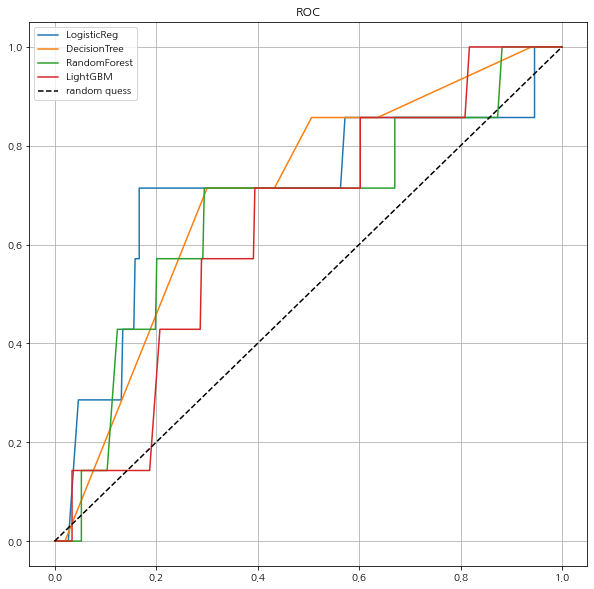

In [670]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid();
    
draw_roc_curve(models, model_names, X_test, y_test)

In [671]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=13, solver='liblinear')

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=200, max_depth=10)

from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(num_leaves=10, n_jobs=-1, n_estimators=100, boost_from_average=False)

# from sklearn.svm import SVC
# svc = SVC(kernel = 'linear')


models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

In [672]:
len(train.columns)

33

In [673]:
from imblearn.over_sampling import SMOTE

In [55]:
'''
['label', 's1', 's2', 'age_group',
       's4', 's5', 's6',
       's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15',
       's16', 's17', 's18', 's19',
       's20', 's21', 's22',
       's23', 'test_set', 'scaled_s14',
       'scaled_s15', 'mm_s14', 'mm_s15',
       'st_s14', 'st_s15', 'rb_s14', 'rb_s15']
'''

"\n['fraud_YN', 'car_model', 'sharing_type', 'age_group',\n       'has_previous_accident', 'cumulative_use_count', 'b2b',\n       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',\n       'duration', 'accident_hour', 'repair_cost', 'insure_cost',\n       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',\n       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',\n       'total_prsn_cnt', 'test_set', 'scaled_repair_cost',\n       'scaled_insure_cost', 'mm_repair_cost', 'mm_insure_cost',\n       'st_repair_cost', 'st_insure_cost', 'rb_repair_cost', 'rb_insure_cost']\n"

In [56]:
cols= ['s1', 's2', 'age_group',
       's4', 's5',
       's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's16', 's17', 's18', 's19',
       's20', 's21', 's22',
       's23']


## 무작위로 n개의 컬럼을 지워서 성능을 확인해보기

In [244]:
X_train = train.drop(['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14'], axis =1)
X_test  =  test.drop(['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14'], axis = 1)                     

In [61]:
cols= ['s1', 's2', 'age_group',
       's4', 's5',
       's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's16', 's17', 's18', 's19',
       's20', 's21', 's22',
       's23']

for _ in range(400):
    i, j , k , l, m, n, o, p, w, y, z = np.random.choice(20, 11, replace=False)
    a = cols[i]
    b= cols[j]
    c= cols[k]
    d= cols[l]
    e= cols[m]
    f = cols[n]
    g = cols[o]
    h = cols[p]
    v = cols[w]
    x = cols[y]
    z1 = cols[z]
    
    X_train_ = X_train.drop([a,b,c,d, e, f , g, h, v, x, z1], axis=1)
    y_train = train['label']

    X_test_ = X_test.drop([a,b,c,d, e,f, g, h, v , x, z1], axis=1)
    y_test = test['label']
    
    print('drop columns: {} / {} /{} / {} / {} / {} / {} / {} / {}/ {} / {}'.format(a,b,c,d,e, f, g, h, v, x, z1  ))

    smote = SMOTE(random_state=13, k_neighbors=30)
    X_train_over, y_train_over = smote.fit_sample(X_train_, y_train)

    

    results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test_, y_test)

    print(results)
    print("-------------------------------------------------------------")

drop columns: has_previous_accident / total_prsn_cnt /car_part2 / duration / acc_type1 / repair_cnt / car_part1 / accident_hour / police_site_aid_YN/ socarpass / age_group
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.70577    0.00249 0.28571 0.00494  0.49628
DecisionTree   0.81871    0.00406 0.28571 0.00800  0.55290
RandomForest   0.85746    0.00260 0.14286 0.00510  0.50107
LightGBM       0.88925    0.00667 0.28571 0.01303  0.58826
-------------------------------------------------------------
drop columns: sharing_type / age_group /repair_cnt / has_previous_accident / insurance_site_aid_YN / acc_type1 / start_hour / police_site_aid_YN / car_part2/ pf_type / duration
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.72478    0.00000 0.00000 0.00000  0.36332
DecisionTree   0.71272    0.00000 0.00000 0.00000  0.35727
RandomForest   0.88889    0.00000 0.00000 0.00000  0.44558
LightGBM       0.89583    0.00000 0.00000 0.00000  0.44907

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.64547    0.00207 0.28571 0.00411  0.46605
DecisionTree   0.43933    0.00261 0.57143 0.00519  0.50521
RandomForest   0.88268    0.00000 0.00000 0.00000  0.44247
LightGBM       0.90570    0.00000 0.00000 0.00000  0.45401
-------------------------------------------------------------
drop columns: police_site_aid_YN / socarpass /car_part1 / socarsave / duration / pf_type / insurance_site_aid_YN / repair_cnt / has_previous_accident/ cumulative_use_count / accident_hour
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.75292    0.00149 0.14286 0.00295  0.44867
DecisionTree   0.85453    0.00506 0.28571 0.00995  0.57085
RandomForest   0.90680    0.00400 0.14286 0.00778  0.52581
LightGBM       0.89254    0.00346 0.14286 0.00676  0.51866
-------------------------------------------------------------
drop columns: accident_ratio / insurance_site_aid_YN /sharing_type / acc_type1 / age_group / car_p

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.72953    0.00271 0.28571 0.00538  0.50819
DecisionTree   0.73648    0.00000 0.00000 0.00000  0.36918
RandomForest   0.89583    0.00357 0.14286 0.00697  0.52031
LightGBM       0.91594    0.00000 0.00000 0.00000  0.45914
-------------------------------------------------------------
drop columns: sharing_type / has_previous_accident /duration / total_prsn_cnt / accident_hour / police_site_aid_YN / accident_ratio / car_model / age_group/ cumulative_use_count / socarpass
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.76425    0.00312 0.28571 0.00616  0.52560
DecisionTree   0.81396    0.00395 0.28571 0.00780  0.55052
RandomForest   0.90789    0.00405 0.14286 0.00787  0.52636
LightGBM       0.91338    0.00000 0.00000 0.00000  0.45786
-------------------------------------------------------------
drop columns: socarsave / age_group /cumulative_use_count / sharing_type / accident_hour / repai

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.74854    0.00581 0.57143 0.01149  0.66021
DecisionTree   0.78180    0.00337 0.28571 0.00666  0.53439
RandomForest   0.91520    0.00000 0.00000 0.00000  0.45878
LightGBM       0.92434    0.00000 0.00000 0.00000  0.46336
-------------------------------------------------------------
drop columns: car_part1 / socarpass /pf_type / car_part2 / police_site_aid_YN / insurance_site_aid_YN / accident_ratio / duration / start_hour/ acc_type1 / car_model
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.69993    0.00123 0.14286 0.00243  0.42211
DecisionTree   0.72844    0.00136 0.14286 0.00268  0.43640
RandomForest   0.87135    0.00288 0.14286 0.00565  0.50804
LightGBM       0.88816    0.00332 0.14286 0.00649  0.51646
-------------------------------------------------------------
drop columns: acc_type1 / insurance_site_aid_YN /car_part1 / start_hour / car_part2 / total_prsn_cnt / accident_ratio / 

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.76827    0.00317 0.28571 0.00627  0.52761
DecisionTree   0.85746    0.00517 0.28571 0.01015  0.57232
RandomForest   0.93165    0.01087 0.28571 0.02094  0.60951
LightGBM       0.91228    0.00844 0.28571 0.01639  0.59980
-------------------------------------------------------------
drop columns: accident_hour / car_model /car_part2 / start_hour / police_site_aid_YN / cumulative_use_count / pf_type / car_part1 / duration/ has_previous_accident / acc_type1
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.82493    0.00211 0.14286 0.00416  0.48477
DecisionTree   0.86038    0.00000 0.00000 0.00000  0.43129
RandomForest   0.91959    0.00000 0.00000 0.00000  0.46097
LightGBM       0.92178    0.00000 0.00000 0.00000  0.46207
-------------------------------------------------------------
drop columns: car_part1 / police_site_aid_YN /socarpass / repair_cnt / insurance_site_aid_YN / cumulative_use_

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.79751    0.00363 0.28571 0.00717  0.54227
DecisionTree   0.64985    0.00313 0.42857 0.00622  0.53950
RandomForest   0.92617    0.00000 0.00000 0.00000  0.46427
LightGBM       0.93129    0.00000 0.00000 0.00000  0.46684
-------------------------------------------------------------
drop columns: sharing_type / police_site_aid_YN /start_hour / duration / socarsave / accident_hour / pf_type / age_group / cumulative_use_count/ accident_ratio / total_prsn_cnt
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.78947    0.00000 0.00000 0.00000  0.39575
DecisionTree   0.48246    0.00142 0.28571 0.00282  0.38434
RandomForest   0.92361    0.00000 0.00000 0.00000  0.46299
LightGBM       0.92544    0.00000 0.00000 0.00000  0.46391
-------------------------------------------------------------
drop columns: start_hour / cumulative_use_count /accident_hour / has_previous_accident / accident_ratio / sha

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.73209    0.00545 0.57143 0.01080  0.65197
DecisionTree   0.74744    0.00291 0.28571 0.00576  0.51717
RandomForest   0.89181    0.00000 0.00000 0.00000  0.44705
LightGBM       0.88743    0.00000 0.00000 0.00000  0.44485
-------------------------------------------------------------
drop columns: accident_ratio / car_part1 /accident_hour / pf_type / car_part2 / cumulative_use_count / socarsave / duration / repair_cnt/ has_previous_accident / start_hour
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.81433    0.00000 0.00000 0.00000  0.40821
DecisionTree   0.67142    0.00112 0.14286 0.00222  0.40782
RandomForest   0.94371    0.00000 0.00000 0.00000  0.47307
LightGBM       0.92873    0.00000 0.00000 0.00000  0.46556
-------------------------------------------------------------
drop columns: police_site_aid_YN / pf_type /acc_type1 / accident_ratio / socarpass / accident_location / accident

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.70577    0.00373 0.42857 0.00740  0.56753
DecisionTree   0.45980    0.00136 0.28571 0.00270  0.37298
RandomForest   0.90899    0.00000 0.00000 0.00000  0.45566
LightGBM       0.92727    0.00000 0.00000 0.00000  0.46482
-------------------------------------------------------------
drop columns: car_model / total_prsn_cnt /accident_hour / start_hour / cumulative_use_count / accident_location / duration / age_group / insurance_site_aid_YN/ socarsave / repair_cnt
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.69846    0.00243 0.28571 0.00483  0.49262
DecisionTree   0.76023    0.00306 0.28571 0.00606  0.52358
RandomForest   0.90058    0.00000 0.00000 0.00000  0.45145
LightGBM       0.90205    0.00000 0.00000 0.00000  0.45218
-------------------------------------------------------------
drop columns: car_part1 / repair_cnt /sharing_type / socarpass / insurance_site_aid_YN / age_group / ac

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.73209    0.00410 0.42857 0.00812  0.58072
DecisionTree   0.72624    0.00000 0.00000 0.00000  0.36405
RandomForest   0.86732    0.00279 0.14286 0.00548  0.50602
LightGBM       0.91703    0.00450 0.14286 0.00873  0.53094
-------------------------------------------------------------
drop columns: car_part1 / age_group /socarpass / accident_ratio / accident_hour / pf_type / insurance_site_aid_YN / duration / car_model/ accident_location / acc_type1
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.78545    0.00342 0.28571 0.00677  0.53622
DecisionTree   0.64985    0.00313 0.42857 0.00622  0.53950
RandomForest   0.90936    0.00816 0.28571 0.01587  0.59834
LightGBM       0.91301    0.00851 0.28571 0.01653  0.60017
-------------------------------------------------------------
drop columns: accident_hour / acc_type1 /police_site_aid_YN / insurance_site_aid_YN / car_model / sharing_type / cumul

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.67544    0.00450 0.57143 0.00893  0.62357
DecisionTree   0.71711    0.00259 0.28571 0.00514  0.50196
RandomForest   0.86038    0.00265 0.14286 0.00521  0.50254
LightGBM       0.86257    0.00000 0.00000 0.00000  0.43239
-------------------------------------------------------------
drop columns: duration / car_model /insurance_site_aid_YN / total_prsn_cnt / police_site_aid_YN / socarsave / has_previous_accident / cumulative_use_count / car_part2/ age_group / repair_cnt
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.73611    0.00139 0.14286 0.00276  0.44024
DecisionTree   0.40497    0.00184 0.42857 0.00367  0.41674
RandomForest   0.86148    0.00532 0.28571 0.01044  0.57433
LightGBM       0.91082    0.00830 0.28571 0.01613  0.59907
-------------------------------------------------------------
drop columns: accident_location / accident_hour /insurance_site_aid_YN / socarsave / acc_type1 

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.76535    0.00157 0.14286 0.00311  0.45490
DecisionTree   0.82493    0.00420 0.28571 0.00828  0.55601
RandomForest   0.91923    0.00000 0.00000 0.00000  0.46079
LightGBM       0.92325    0.00000 0.00000 0.00000  0.46281
-------------------------------------------------------------
drop columns: car_part1 / repair_cnt /accident_ratio / accident_hour / socarsave / pf_type / car_model / age_group / has_previous_accident/ insurance_site_aid_YN / total_prsn_cnt
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.71564    0.00129 0.14286 0.00256  0.42998
DecisionTree   0.82237    0.00414 0.28571 0.00816  0.55473
RandomForest   0.88743    0.00000 0.00000 0.00000  0.44485
LightGBM       0.92507    0.00000 0.00000 0.00000  0.46372
-------------------------------------------------------------
drop columns: age_group / acc_type1 /accident_location / car_part1 / accident_hour / socarpass / car_model 

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.70651    0.00250 0.28571 0.00496  0.49665
DecisionTree   0.74452    0.00144 0.14286 0.00285  0.44446
RandomForest   0.87098    0.00287 0.14286 0.00563  0.50785
LightGBM       0.89985    0.00000 0.00000 0.00000  0.45108
-------------------------------------------------------------
drop columns: accident_hour / car_model /sharing_type / accident_ratio / socarpass / insurance_site_aid_YN / car_part1 / socarsave / has_previous_accident/ duration / start_hour
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.77997    0.00334 0.28571 0.00660  0.53348
DecisionTree   0.64985    0.00313 0.42857 0.00622  0.53950
RandomForest   0.94225    0.01290 0.28571 0.02469  0.61482
LightGBM       0.92507    0.00990 0.28571 0.01914  0.60621
-------------------------------------------------------------
drop columns: car_model / insurance_site_aid_YN /car_part2 / start_hour / sharing_type / accident_hour / pol

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.82931    0.00216 0.14286 0.00426  0.48697
DecisionTree   0.64985    0.00313 0.42857 0.00622  0.53950
RandomForest   0.94591    0.00000 0.00000 0.00000  0.47417
LightGBM       0.92069    0.00000 0.00000 0.00000  0.46152
-------------------------------------------------------------
drop columns: car_part2 / socarpass /age_group / insurance_site_aid_YN / total_prsn_cnt / duration / acc_type1 / car_part1 / sharing_type/ accident_ratio / cumulative_use_count
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.75073    0.00148 0.14286 0.00292  0.44757
DecisionTree   0.42909    0.00192 0.42857 0.00383  0.42883
RandomForest   0.90095    0.00376 0.14286 0.00733  0.52288
LightGBM       0.91703    0.00000 0.00000 0.00000  0.45969
-------------------------------------------------------------
drop columns: acc_type1 / accident_hour /insurance_site_aid_YN / cumulative_use_count / socarsave / police_si

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.71199    0.00128 0.14286 0.00253  0.42815
DecisionTree   0.45797    0.00135 0.28571 0.00269  0.37206
RandomForest   0.89985    0.00000 0.00000 0.00000  0.45108
LightGBM       0.91301    0.00000 0.00000 0.00000  0.45768
-------------------------------------------------------------
drop columns: accident_location / start_hour /pf_type / sharing_type / socarsave / car_part2 / accident_hour / socarpass / cumulative_use_count/ has_previous_accident / car_model
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.83004    0.00217 0.14286 0.00428  0.48733
DecisionTree   0.64985    0.00313 0.42857 0.00622  0.53950
RandomForest   0.94298    0.00000 0.00000 0.00000  0.47270
LightGBM       0.93238    0.00000 0.00000 0.00000  0.46739
-------------------------------------------------------------
drop columns: start_hour / has_previous_accident /accident_location / car_model / total_prsn_cnt / acc_type

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.69115    0.00355 0.42857 0.00705  0.56020
DecisionTree   0.54642    0.00322 0.57143 0.00641  0.55889
RandomForest   0.86221    0.00269 0.14286 0.00528  0.50345
LightGBM       0.90168    0.00000 0.00000 0.00000  0.45200
-------------------------------------------------------------
drop columns: sharing_type / police_site_aid_YN /has_previous_accident / acc_type1 / insurance_site_aid_YN / pf_type / accident_hour / car_part1 / duration/ cumulative_use_count / car_part2
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.75073    0.00000 0.00000 0.00000  0.37633
DecisionTree   0.72990    0.00000 0.00000 0.00000  0.36588
RandomForest   0.88377    0.00000 0.00000 0.00000  0.44302
LightGBM       0.88743    0.00000 0.00000 0.00000  0.44485
-------------------------------------------------------------
drop columns: total_prsn_cnt / acc_type1 /start_hour / duration / car_part2 / accident_hour / so

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.81725    0.00000 0.00000 0.00000  0.40967
DecisionTree   0.45797    0.00135 0.28571 0.00269  0.37206
RandomForest   0.89218    0.00000 0.00000 0.00000  0.44723
LightGBM       0.93494    0.00000 0.00000 0.00000  0.46867
-------------------------------------------------------------
drop columns: repair_cnt / car_part1 /car_part2 / police_site_aid_YN / socarsave / accident_hour / acc_type1 / socarpass / age_group/ car_model / total_prsn_cnt
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.70614    0.00125 0.14286 0.00248  0.42522
DecisionTree   0.81944    0.00407 0.28571 0.00803  0.55326
RandomForest   0.88816    0.00660 0.28571 0.01290  0.58771
LightGBM       0.89620    0.00358 0.14286 0.00699  0.52049
-------------------------------------------------------------
drop columns: duration / acc_type1 /age_group / repair_cnt / start_hour / car_model / total_prsn_cnt / socarsave / socarpass/

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.64583    0.00310 0.42857 0.00615  0.53748
DecisionTree   0.73465    0.00000 0.00000 0.00000  0.36827
RandomForest   0.86550    0.00000 0.00000 0.00000  0.43386
LightGBM       0.89327    0.00000 0.00000 0.00000  0.44778
-------------------------------------------------------------
drop columns: accident_ratio / acc_type1 /insurance_site_aid_YN / accident_hour / age_group / police_site_aid_YN / start_hour / duration / pf_type/ has_previous_accident / car_part2
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.71930    0.00000 0.00000 0.00000  0.36057
DecisionTree   0.70175    0.00123 0.14286 0.00244  0.42302
RandomForest   0.88560    0.00000 0.00000 0.00000  0.44394
LightGBM       0.89620    0.00000 0.00000 0.00000  0.44925
-------------------------------------------------------------
drop columns: insurance_site_aid_YN / pf_type /sharing_type / car_part2 / socarpass / car_model / car_pa

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.75950    0.00305 0.28571 0.00604  0.52322
DecisionTree   0.62902    0.00198 0.28571 0.00393  0.45781
RandomForest   0.92909    0.00000 0.00000 0.00000  0.46574
LightGBM       0.91265    0.00000 0.00000 0.00000  0.45749
-------------------------------------------------------------
drop columns: age_group / car_model /acc_type1 / start_hour / cumulative_use_count / insurance_site_aid_YN / pf_type / repair_cnt / police_site_aid_YN/ duration / accident_location
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.72734    0.00135 0.14286 0.00267  0.43585
DecisionTree   0.72990    0.00000 0.00000 0.00000  0.36588
RandomForest   0.87061    0.00000 0.00000 0.00000  0.43642
LightGBM       0.88377    0.00000 0.00000 0.00000  0.44302
-------------------------------------------------------------
drop columns: cumulative_use_count / has_previous_accident /socarpass / duration / repair_cnt / accident_

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.70468    0.00372 0.42857 0.00737  0.56698
DecisionTree   0.70175    0.00123 0.14286 0.00244  0.42302
RandomForest   0.87463    0.00000 0.00000 0.00000  0.43844
LightGBM       0.88414    0.00000 0.00000 0.00000  0.44320
-------------------------------------------------------------
drop columns: pf_type / insurance_site_aid_YN /accident_location / sharing_type / has_previous_accident / accident_hour / repair_cnt / car_part1 / total_prsn_cnt/ car_part2 / socarsave
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.69444    0.00120 0.14286 0.00239  0.41936
DecisionTree   0.79130    0.00352 0.28571 0.00696  0.53916
RandomForest   0.91009    0.00000 0.00000 0.00000  0.45621
LightGBM       0.90972    0.00000 0.00000 0.00000  0.45603
-------------------------------------------------------------
drop columns: sharing_type / accident_location /pf_type / total_prsn_cnt / police_site_aid_YN / age_g

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.75146    0.00148 0.14286 0.00293  0.44794
DecisionTree   0.72990    0.00000 0.00000 0.00000  0.36588
RandomForest   0.88596    0.00000 0.00000 0.00000  0.44412
LightGBM       0.90058    0.00000 0.00000 0.00000  0.45145
-------------------------------------------------------------
drop columns: age_group / car_part2 /has_previous_accident / insurance_site_aid_YN / accident_hour / accident_location / duration / cumulative_use_count / socarpass/ police_site_aid_YN / car_part1
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.75621    0.00450 0.42857 0.00892  0.59281
DecisionTree   0.64876    0.00313 0.42857 0.00620  0.53895
RandomForest   0.90022    0.00373 0.14286 0.00727  0.52251
LightGBM       0.89364    0.00350 0.14286 0.00683  0.51921
-------------------------------------------------------------
drop columns: car_part2 / accident_ratio /accident_hour / acc_type1 / insurance_site_aid_

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.80409    0.00375 0.28571 0.00741  0.54557
DecisionTree   0.72515    0.00134 0.14286 0.00265  0.43475
RandomForest   0.93275    0.00559 0.14286 0.01075  0.53882
LightGBM       0.92580    0.00505 0.14286 0.00976  0.53533
-------------------------------------------------------------
drop columns: total_prsn_cnt / accident_location /pf_type / has_previous_accident / cumulative_use_count / acc_type1 / sharing_type / duration / car_part1/ police_site_aid_YN / accident_ratio
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.78655    0.00173 0.14286 0.00341  0.46553
DecisionTree   0.46308    0.00272 0.57143 0.00542  0.51712
RandomForest   0.89839    0.00727 0.28571 0.01418  0.59284
LightGBM       0.92215    0.00000 0.00000 0.00000  0.46226
-------------------------------------------------------------
drop columns: duration / insurance_site_aid_YN /car_part2 / police_site_aid_YN / total_prsn_cn

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.74452    0.00144 0.14286 0.00285  0.44446
DecisionTree   0.82346    0.00417 0.28571 0.00821  0.55528
RandomForest   0.91411    0.00435 0.14286 0.00844  0.52947
LightGBM       0.90863    0.00408 0.14286 0.00794  0.52672
-------------------------------------------------------------
drop columns: car_part2 / duration /car_part1 / accident_ratio / police_site_aid_YN / total_prsn_cnt / accident_hour / insurance_site_aid_YN / age_group/ socarpass / cumulative_use_count
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.72770    0.00135 0.14286 0.00268  0.43603
DecisionTree   0.81396    0.00395 0.28571 0.00780  0.55052
RandomForest   0.88450    0.00322 0.14286 0.00629  0.51463
LightGBM       0.90387    0.00769 0.28571 0.01498  0.59559
-------------------------------------------------------------
drop columns: socarsave / accident_hour /car_part1 / total_prsn_cnt / car_model / police_site_aid_Y

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.77303    0.00162 0.14286 0.00321  0.45875
DecisionTree   0.82237    0.00414 0.28571 0.00816  0.55473
RandomForest   0.91923    0.00000 0.00000 0.00000  0.46079
LightGBM       0.91484    0.00000 0.00000 0.00000  0.45859
-------------------------------------------------------------
drop columns: has_previous_accident / car_model /total_prsn_cnt / accident_location / car_part1 / repair_cnt / insurance_site_aid_YN / age_group / accident_hour/ socarsave / duration
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.65461    0.00318 0.42857 0.00631  0.54188
DecisionTree   0.79605    0.00360 0.28571 0.00712  0.54154
RandomForest   0.86806    0.00000 0.00000 0.00000  0.43514
LightGBM       0.89730    0.00000 0.00000 0.00000  0.44980
-------------------------------------------------------------
drop columns: accident_hour / car_model /start_hour / car_part2 / repair_cnt / duration / car_part1 / c

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.71491    0.00257 0.28571 0.00510  0.50086
DecisionTree   0.78838    0.00347 0.28571 0.00686  0.53769
RandomForest   0.92251    0.00000 0.00000 0.00000  0.46244
LightGBM       0.91374    0.00000 0.00000 0.00000  0.45804
-------------------------------------------------------------
drop columns: accident_hour / repair_cnt /has_previous_accident / socarsave / car_model / police_site_aid_YN / sharing_type / insurance_site_aid_YN / car_part2/ start_hour / socarpass
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.76133    0.00154 0.14286 0.00305  0.45289
DecisionTree   0.85417    0.00505 0.28571 0.00993  0.57067
RandomForest   0.94006    0.00000 0.00000 0.00000  0.47123
LightGBM       0.92251    0.00000 0.00000 0.00000  0.46244
-------------------------------------------------------------
drop columns: duration / has_previous_accident /cumulative_use_count / accident_location / car_part2 /

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.77668    0.00329 0.28571 0.00650  0.53183
DecisionTree   0.72076    0.00132 0.14286 0.00261  0.43255
RandomForest   0.93238    0.00000 0.00000 0.00000  0.46739
LightGBM       0.93896    0.00000 0.00000 0.00000  0.47069
-------------------------------------------------------------
drop columns: accident_ratio / total_prsn_cnt /car_part2 / cumulative_use_count / age_group / pf_type / socarpass / car_model / car_part1/ sharing_type / accident_location
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.74306    0.00143 0.14286 0.00284  0.44373
DecisionTree   0.73684    0.00000 0.00000 0.00000  0.36937
RandomForest   0.91155    0.00000 0.00000 0.00000  0.45694
LightGBM       0.91959    0.00000 0.00000 0.00000  0.46097
-------------------------------------------------------------
drop columns: pf_type / accident_hour /acc_type1 / sharing_type / car_part2 / car_model / accident_location / repa

In [235]:
for _ in range(60):
    i, j , k , l, m, n, o, p, w, y, s, u = np.random.choice(20, 12, replace=False)
    a = cols[i]
    b= cols[j]
    c= cols[k]
    d= cols[l]
    e= cols[m]
    f = cols[n]
    g = cols[o]
    h = cols[p]
    q = cols[s]
    t = cols[u]
    v = cols[w]
    x = cols[y]
    
    
    
    X_train_ = X_train.drop([a,b,c,d, e, f , g, h, v, x, q ,t ], axis=1)
    y_train = train['label']

    X_test_ = X_test.drop([a,b,c,d, e,f, g, h, v , x, q , t], axis=1)
    y_test = test['label']
    
    print('drop columns: {} / {} /{} / {} / {} / {} / {} / {} / {} / {}'.format(a,b,c,d,e, f, g, h, v, x , q,  t ))

    smote = SMOTE(random_state=13, k_neighbors=30)
    X_train_over, y_train_over = smote.fit_sample(X_train_, y_train)

    

    results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test_, y_test)

    print(results)
    print("-------------------------------------------------------------")

drop columns: accident_hour / police_site_aid_YN /socarpass / sharing_type / acc_type1 / accident_ratio / pf_type / car_model / start_hour / total_prsn_cnt
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.81835    0.00000 0.00000 0.00000  0.41022
DecisionTree   0.64547    0.00310 0.42857 0.00615  0.53730
RandomForest   0.87463    0.00000 0.00000 0.00000  0.43844
LightGBM       0.89072    0.00000 0.00000 0.00000  0.44650
-------------------------------------------------------------
drop columns: accident_hour / accident_ratio /duration / repair_cnt / socarsave / car_model / pf_type / age_group / acc_type1 / insurance_site_aid_YN
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.80300    0.00373 0.28571 0.00737  0.54502
DecisionTree   0.71345    0.00510 0.57143 0.01010  0.64262
RandomForest   0.86477    0.00000 0.00000 0.00000  0.43349
LightGBM       0.90534    0.00000 0.00000 0.00000  0.45383
------------------------------------------

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.83772    0.00899 0.57143 0.01770  0.70492
DecisionTree   0.71784    0.00517 0.57143 0.01026  0.64482
RandomForest   0.86915    0.00563 0.28571 0.01105  0.57818
LightGBM       0.87610    0.00595 0.28571 0.01166  0.58166
-------------------------------------------------------------
drop columns: total_prsn_cnt / acc_type1 /police_site_aid_YN / accident_ratio / insurance_site_aid_YN / duration / accident_hour / pf_type / accident_location / car_part1
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.86586    0.00549 0.28571 0.01078  0.57653
DecisionTree   0.68092    0.00458 0.57143 0.00908  0.62632
RandomForest   0.87902    0.00610 0.28571 0.01194  0.58313
LightGBM       0.88633    0.00649 0.28571 0.01270  0.58679
-------------------------------------------------------------
drop columns: start_hour / sharing_type /car_part2 / accident_ratio / car_model / socarsave / repair_cnt / cumulati

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.67032    0.00443 0.57143 0.00879  0.62100
DecisionTree   0.73099    0.00273 0.28571 0.00541  0.50893
RandomForest   0.83187    0.00438 0.28571 0.00862  0.55949
LightGBM       0.85673    0.00514 0.28571 0.01010  0.57195
-------------------------------------------------------------
drop columns: repair_cnt / insurance_site_aid_YN /start_hour / acc_type1 / cumulative_use_count / car_part2 / total_prsn_cnt / accident_ratio / age_group / duration
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.74452    0.00000 0.00000 0.00000  0.37321
DecisionTree   0.52741    0.00309 0.57143 0.00615  0.54936
RandomForest   0.87902    0.00000 0.00000 0.00000  0.44064
LightGBM       0.89693    0.00000 0.00000 0.00000  0.44962
-------------------------------------------------------------
drop columns: repair_cnt / start_hour /sharing_type / car_part2 / has_previous_accident / police_site_aid_YN / age_group 

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.73465    0.00277 0.28571 0.00548  0.51076
DecisionTree   0.66959    0.00332 0.42857 0.00659  0.54939
RandomForest   0.90570    0.00000 0.00000 0.00000  0.45401
LightGBM       0.92507    0.00000 0.00000 0.00000  0.46372
-------------------------------------------------------------
drop columns: duration / has_previous_accident /acc_type1 / repair_cnt / cumulative_use_count / total_prsn_cnt / accident_hour / start_hour / age_group / accident_ratio
              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.59357    0.00090 0.14286 0.00180  0.36879
DecisionTree   0.45102    0.00200 0.42857 0.00398  0.43983
RandomForest   0.82200    0.00000 0.00000 0.00000  0.41206
LightGBM       0.85526    0.00000 0.00000 0.00000  0.42873
-------------------------------------------------------------
drop columns: pf_type / car_part2 /start_hour / acc_type1 / socarpass / insurance_site_aid_YN / has_previous_accident

In [238]:
X_train.columns

Index(['fraud_YN', 'car_model', 'sharing_type', 'cumulative_use_count', 'b2b',
       'socarsave', 'start_hour', 'accident_hour', 'repair_cost',
       'insure_cost', 'car_part1', 'repair_cnt', 'acc_type1',
       'police_site_aid_YN', 'test_set', 'scaled_repair_cost',
       'scaled_insure_cost', 'mm_repair_cost', 'mm_insure_cost',
       'st_repair_cost', 'st_insure_cost', 'rb_repair_cost', 'rb_insure_cost'],
      dtype='object')

In [452]:
# smote 

X_train = train.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_train = train['label']

X_test = test.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_test = test['label']


# st1= StandardScaler()
# st2 = StandardScaler()

# X_train_st = st1.fit_transform(X_train)
# X_train_st = pd.DataFrame(X_train_st, columns=X_train.columns, index=list(X_train.index.values))


# X_test_st = st1.transform(X_test)
# X_test_st = pd.DataFrame(X_test_st, columns=X_test.columns, index=list(X_test.index.values))


smote = SMOTE(random_state=13, k_neighbors=30)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

    

results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print(results)

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.80371    0.00923 0.71429 0.01821  0.75911
DecisionTree   0.60852    0.00464 0.71429 0.00922  0.66127
RandomForest   0.84669    0.00714 0.42857 0.01405  0.63816
LightGBM       0.88784    0.00330 0.14286 0.00645  0.51630


In [397]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [291]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel= 'rbf', gamma =5, C=500))
])

rbf_kernel_svm_clf.fit(X_train_over, y_train_over)
lo_pred=rbf_kernel_svm_clf.predict(X_test)

print_clf_eval(y_test, lo_pred)

------confusion matrix
[[2304  425]
 [   4    3]]
Accuracy:0.8432017543859649, precision:0.007009345794392523
recall"0.42857142857142855, F1:0.013793103448275862, AUC:0.6364183636078103


In [292]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train_over, y_train_over)
lo_pred= svc.predict(X_test)

print_clf_eval(y_test, lo_pred)

------confusion matrix
[[2210  519]
 [   2    5]]
Accuracy:0.8095760233918129, precision:0.009541984732824428
recall"0.7142857142857143, F1:0.018832391713747648, AUC:0.762053080667958


In [315]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)

dt_clf.fit(X_train_over, y_train_over)
dt_pred= dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[1738  991]
 [   2    5]]
Accuracy:0.6370614035087719, precision:0.0050200803212851405
recall"0.7142857142857143, F1:0.009970089730807577, AUC:0.6755745170915564


In [316]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=200, max_depth=10)

rf_clf.fit(X_train_over, y_train_over)
rf_pred= rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

------confusion matrix
[[2316  413]
 [   5    2]]
Accuracy:0.8472222222222222, precision:0.004819277108433735
recall"0.2857142857142857, F1:0.009478672985781993, AUC:0.5671883997277914


In [317]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(num_leaves=200, n_jobs=-1, n_estimators=500, boost_from_average=False)

lgbm_clf.fit(X_train_over, y_train_over)
lgbm_pred= lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

------confusion matrix
[[2498  231]
 [   7    0]]
Accuracy:0.9130116959064327, precision:0.0
recall"0.0, F1:0.0, AUC:0.45767680469036276


In [322]:
from xgboost import XGBClassifier

evals = [(X_test.values, y_test)]

xgb= XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_over.values, y_train_over, early_stopping_rounds=10, eval_set=evals)

[22:57:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66398
[1]	validation_0-logloss:0.63905
[2]	validation_0-logloss:0.61755
[3]	validation_0-logloss:0.60287
[4]	validation_0-logloss:0.58836
[5]	validation_0-logloss:0.57754
[6]	validation_0-logloss:0.56429
[7]	validation_0-logloss:0.55625
[8]	validation_0-logloss:0.54786
[9]	validation_0-logloss:0.52827
[10]	validation_0-logloss:0.51887
[11]	validation_0-logloss:0.51309
[12]	validation_0-logloss:0.50001
[13]	validation_0-logloss:0.48843
[14]	validation_0-logloss:0.48553
[15]	validation_0-logloss:0.47958
[16]	validation_0-logloss:0.47009
[17]	validation_0-logloss:0.46629
[18]	validation_0-logloss:0.46191
[19]	validation_0-logloss:0.45729
[20]	validation_0-logloss:0.45462
[21]	validatio

[230]	validation_0-logloss:0.23526
[231]	validation_0-logloss:0.23458
[232]	validation_0-logloss:0.23449
[233]	validation_0-logloss:0.23441
[234]	validation_0-logloss:0.23425
[235]	validation_0-logloss:0.23424
[236]	validation_0-logloss:0.23425
[237]	validation_0-logloss:0.23397
[238]	validation_0-logloss:0.23407
[239]	validation_0-logloss:0.23395
[240]	validation_0-logloss:0.23358
[241]	validation_0-logloss:0.23356
[242]	validation_0-logloss:0.23348
[243]	validation_0-logloss:0.23346
[244]	validation_0-logloss:0.23351
[245]	validation_0-logloss:0.23299
[246]	validation_0-logloss:0.23275
[247]	validation_0-logloss:0.23285
[248]	validation_0-logloss:0.23296
[249]	validation_0-logloss:0.23292
[250]	validation_0-logloss:0.23287
[251]	validation_0-logloss:0.23278
[252]	validation_0-logloss:0.23180
[253]	validation_0-logloss:0.23176
[254]	validation_0-logloss:0.23146
[255]	validation_0-logloss:0.23141
[256]	validation_0-logloss:0.23142
[257]	validation_0-logloss:0.23140
[258]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [323]:
xgb_pred= xgb.predict(X_test.values)

print_clf_eval(y_test, xgb_pred)

------confusion matrix
[[2436  293]
 [   7    0]]
Accuracy:0.8903508771929824, precision:0.0
recall"0.0, F1:0.0, AUC:0.44631733235617443


In [453]:
# adasyn을 활용한 오버샘플링(단독 오버샘플링으로는 가장 좋음)

from imblearn.over_sampling import ADASYN

X_train = train.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_train = train['label']

X_test = test.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_test = test['label']


ada =ADASYN( random_state=13, n_neighbors=30)
X_train_ada, y_train_ada = ada.fit_sample(X_train, y_train)

    

results = get_result_pd(models, model_names, X_train_ada, y_train_ada, X_test, y_test)

print(results)

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.80189    0.00914 0.71429 0.01805  0.75820
DecisionTree   0.60852    0.00464 0.71429 0.00922  0.66127
RandomForest   0.84669    0.00714 0.42857 0.01405  0.63816
LightGBM       0.89111    0.00000 0.00000 0.00000  0.44670


In [293]:
# BorderlineSMOTE 오버샘플링(accuracy는 올라가지만 recall은 떨어짐)

from imblearn.over_sampling import BorderlineSMOTE

X_train = train.drop(['label', 'test_set', 's14', 's15', 
's9','s16','s20','s21','s6','rb_s14','rb_s15','scaled_s15','scaled_s14','mm_s15','st_s14'], axis=1)
y_train = train['label']

X_test = test.drop(['label', 'test_set', 's14', 's15', 
's9','s16','s20','s21','s6','rb_s14','rb_s15','scaled_s15','scaled_s14','mm_s15','st_s14'], axis=1)
y_test = test['label']


Bsmote = BorderlineSMOTE(random_state=13, k_neighbors=30, m_neighbors=60)
X_train_over, y_train_over = Bsmote.fit_sample(X_train, y_train)

    

results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print(results)

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.86075    0.00266 0.14286 0.00522  0.50272
DecisionTree   0.37061    0.00347 0.85714 0.00692  0.61325
RandomForest   0.88377    0.00319 0.14286 0.00625  0.51426
LightGBM       0.91923    0.00000 0.00000 0.00000  0.46079


### one-hot 후 파이프라인 추가

In [674]:

# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + enn)

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours


X_train = train.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_train = train['label']

X_test = test.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_test = test['label']


# st1= StandardScaler()
# st2 = StandardScaler()

# X_train_st = st1.fit_transform(X_train)
# X_train_st = pd.DataFrame(X_train_st, columns=X_train.columns, index=list(X_train.index.values))


# X_test_st = st1.transform(X_test)
# X_test_st = pd.DataFrame(X_test_st, columns=X_test.columns, index=list(X_test.index.values))


# define pipeline
over = SMOTE(random_state=13, k_neighbors=30)
under = EditedNearestNeighbours(n_neighbors=5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X_train, y_train)


    

results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)

print(results)

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.82893    0.01066 0.71429 0.02101  0.77175
DecisionTree   0.69934    0.00608 0.71429 0.01206  0.70679
RandomForest   0.94567    0.00000 0.00000 0.00000  0.47405
LightGBM       0.94897    0.00746 0.14286 0.01418  0.54695


In [455]:
# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + tomeklinks)

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours


X_train = train.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_train = train['label']

X_test = test.drop( ['label', 'test_set', 's14', 's15', 'rb_s15','rb_s14', 'scaled_s15', 'scaled_s14', 'mm_s15', 'st_s14','s9' , 'age_group' ,'s21' , 's23' , 's18' , 's4' , 's7' , 's16' , 's8' , 's12',  ], axis= 1)
y_test = test['label']



# st1= StandardScaler()
# st2 = StandardScaler()

# X_train_st = st1.fit_transform(X_train)
# X_train_st = pd.DataFrame(X_train_st, columns=X_train.columns, index=list(X_train.index.values))


# X_test_st = st1.transform(X_test)
# X_test_st = pd.DataFrame(X_test_st, columns=X_test.columns, index=list(X_test.index.values))


# define pipeline
over = SMOTE(random_state=13, k_neighbors=30)
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X_train, y_train)


    

results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)

print(results)

              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.80772    0.00942 0.71429 0.01859  0.76112
DecisionTree   0.63620    0.00499 0.71429 0.00991  0.67514
RandomForest   0.85725    0.00767 0.42857 0.01508  0.64346
LightGBM       0.90605    0.00000 0.00000 0.00000  0.45418


## 가장 좋은 모델 성능(2021/01/07)
### pipeline 통과 SMOTE+ENN (로지스틱 레그리션)

In [675]:
from sklearn.linear_model import LogisticRegression

lo_clf = LogisticRegression(random_state=13, solver='liblinear')

lo_clf.fit(X_train_mix, y_train_mix)
lo_pred= lo_clf.predict(X_test)

print_clf_eval(y_test, lo_pred)

------confusion matrix
[[2253  464]
 [   2    5]]
Accuracy:0.828928046989721, precision:0.010660980810234541
recall"0.7142857142857143, F1:0.021008403361344536, AUC:0.7717545612282455


## 모델성능
### pipeline 통과 SMOTE+Tomek (서포트벡터머신) 

In [326]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel= 'rbf', gamma =5, C=500))
])

rbf_kernel_svm_clf.fit(X_train_mix, y_train_mix)
lo_pred=rbf_kernel_svm_clf.predict(X_test)

print_clf_eval(y_test, lo_pred)

------confusion matrix
[[2323  406]
 [   4    3]]
Accuracy:0.8501461988304093, precision:0.007334963325183374
recall"0.42857142857142855, F1:0.014423076923076924, AUC:0.6398994922263519


In [676]:

from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train_mix, y_train_mix)
lo_pred= svc.predict(X_test)

print_clf_eval(y_test, lo_pred)

------confusion matrix
[[2207  510]
 [   2    5]]
Accuracy:0.8120411160058737, precision:0.009708737864077669
recall"0.7142857142857143, F1:0.019157088122605363, AUC:0.7632893422367107


In [328]:
lo_pred= lo_clf.predict(X_train_mix)

print_clf_eval(y_train_mix, lo_pred)

------confusion matrix
[[8988 1873]
 [2343 7955]]
Accuracy:0.8007467271610189, precision:0.8094220594220595
recall"0.7724800932219849, F1:0.7905197257279141, AUC:0.8000141005655086


In [140]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)

dt_clf.fit(X_train_mix, y_train_mix)
dt_pred= dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[2511  218]
 [   6    1]]
Accuracy:0.9181286549707602, precision:0.0045662100456621
recall"0.14285714285714285, F1:0.008849557522123894, AUC:0.5314872009631995


In [318]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(num_leaves=200, n_jobs=-1, n_estimators=500, boost_from_average=False)

lgbm_clf.fit(X_train_mix, y_train_mix)
lgbm_pred= lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

------confusion matrix
[[2638   91]
 [   6    1]]
Accuracy:0.964546783625731, precision:0.010869565217391304
recall"0.14285714285714285, F1:0.020202020202020204, AUC:0.5547557975187143


In [320]:
from xgboost import XGBClassifier

evals = [(X_test.values, y_test)]

xgb= XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_mix.values, y_train_mix, early_stopping_rounds=10, eval_set=evals)

[22:56:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.64693
[1]	validation_0-logloss:0.60838
[2]	validation_0-logloss:0.57915
[3]	validation_0-logloss:0.53871
[4]	validation_0-logloss:0.51491
[5]	validation_0-logloss:0.48339
[6]	validation_0-logloss:0.46610
[7]	validation_0-logloss:0.44079
[8]	validation_0-logloss:0.42562
[9]	validation_0-logloss:0.41496
[10]	validation_0-logloss:0.40193
[11]	validation_0-logloss:0.39001
[12]	validation_0-logloss:0.38157
[13]	validation_0-logloss:0.36809
[14]	validation_0-logloss:0.35861
[15]	validation_0-logloss:0.34679
[16]	validation_0-logloss:0.34091
[17]	validation_0-logloss:0.33359
[18]	validation_0-logloss:0.32806
[19]	validation_0-logloss:0.32354
[20]	validation_0-logloss:0.31268
[21]	validatio

[230]	validation_0-logloss:0.12772
[231]	validation_0-logloss:0.12781
[232]	validation_0-logloss:0.12788
[233]	validation_0-logloss:0.12786
[234]	validation_0-logloss:0.12792
[235]	validation_0-logloss:0.12787
[236]	validation_0-logloss:0.12790
[237]	validation_0-logloss:0.12772
[238]	validation_0-logloss:0.12758
[239]	validation_0-logloss:0.12770
[240]	validation_0-logloss:0.12763
[241]	validation_0-logloss:0.12737
[242]	validation_0-logloss:0.12729
[243]	validation_0-logloss:0.12694
[244]	validation_0-logloss:0.12673
[245]	validation_0-logloss:0.12671
[246]	validation_0-logloss:0.12662
[247]	validation_0-logloss:0.12653
[248]	validation_0-logloss:0.12650
[249]	validation_0-logloss:0.12623
[250]	validation_0-logloss:0.12619
[251]	validation_0-logloss:0.12620
[252]	validation_0-logloss:0.12596
[253]	validation_0-logloss:0.12594
[254]	validation_0-logloss:0.12595
[255]	validation_0-logloss:0.12594
[256]	validation_0-logloss:0.12602
[257]	validation_0-logloss:0.12556
[258]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [321]:
xgb_pred= xgb.predict(X_test.values)

print_clf_eval(y_test, xgb_pred)

------confusion matrix
[[2612  117]
 [   7    0]]
Accuracy:0.9546783625730995, precision:0.0
recall"0.0, F1:0.0, AUC:0.4785635764016123


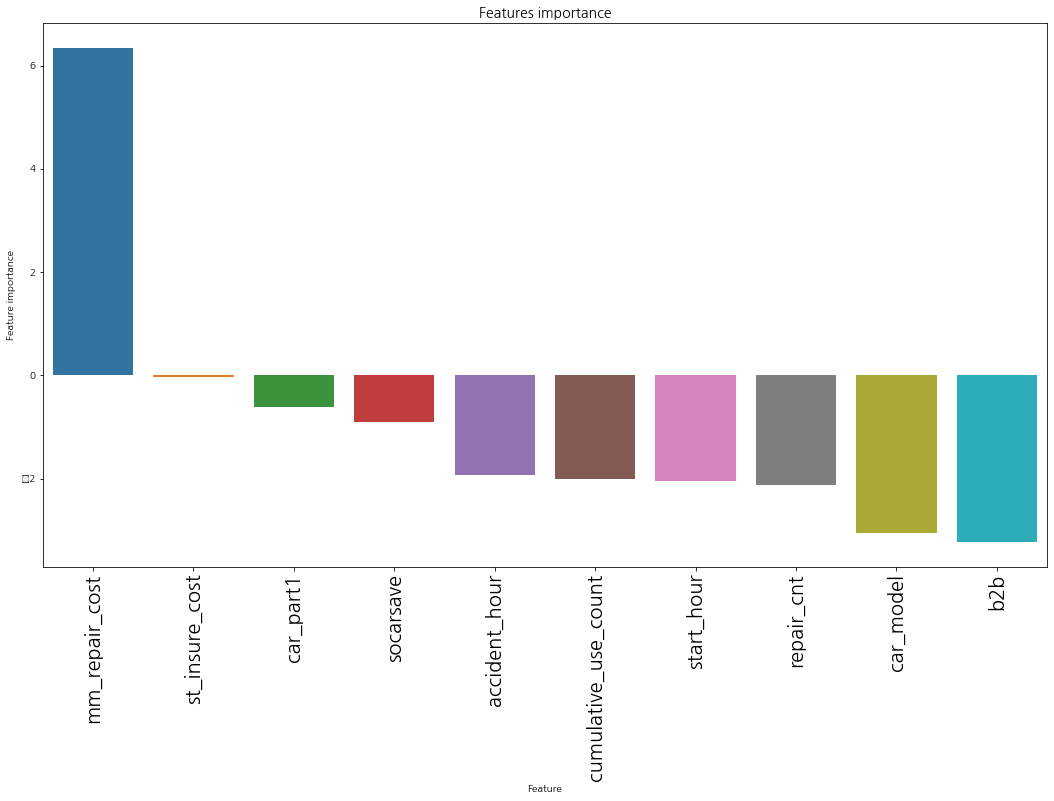

In [470]:
tmp = pd.DataFrame({'Feature': X_train_over.columns, 'Feature importance': lr_clf.coef_.reshape(-1,)})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (18,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90, size = 20)
plt.show() 